In [258]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [259]:
train = pd.read_csv("C:\\Users\\Ambarish Deb\\Desktop\\STUDY\\Nuclei\\Internship\\data\\Train_UWu5bXk.csv")
test = pd.read_csv("C:\\Users\\Ambarish Deb\\Desktop\\STUDY\\Nuclei\\Internship\\data\\Test_u94Q5KV.csv")

train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [260]:
train.shape, test.shape
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [261]:
train.dtypes, test.dtypes

(Item_Identifier               object
 Item_Weight                  float64
 Item_Fat_Content              object
 Item_Visibility              float64
 Item_Type                     object
 Item_MRP                     float64
 Outlet_Identifier             object
 Outlet_Establishment_Year      int64
 Outlet_Size                   object
 Outlet_Location_Type          object
 Outlet_Type                   object
 Item_Outlet_Sales            float64
 dtype: object,
 Item_Identifier               object
 Item_Weight                  float64
 Item_Fat_Content              object
 Item_Visibility              float64
 Item_Type                     object
 Item_MRP                     float64
 Outlet_Identifier             object
 Outlet_Establishment_Year      int64
 Outlet_Size                   object
 Outlet_Location_Type          object
 Outlet_Type                   object
 dtype: object)

In [263]:
train['source']='train'
test['source']='test'
combi = pd.concat([train, test], ignore_index = True)
combi.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [264]:
combi.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [265]:
"""
inferences-
1. Some items in item_weight are missing.
2. mean>median so slight rightwards skew.
3. Minimum value of item visibillity is 0 which is not practical. Hence 0 to be treated as NaN value.
"""

'\ninferences-\n1. Some items in item_weight are missing.\n2. mean>median so slight rightwards skew.\n3. Minimum value of item visibillity is 0 which is not practical. Hence 0 to be treated as NaN value.\n'

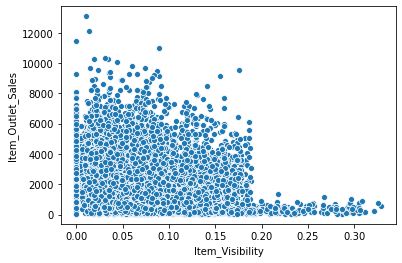

In [266]:
#Scatter plot Item visibillity vs Item outlet sales

sns.scatterplot(train["Item_Visibility"], train["Item_Outlet_Sales"]);

<BarContainer object of 8523 artists>

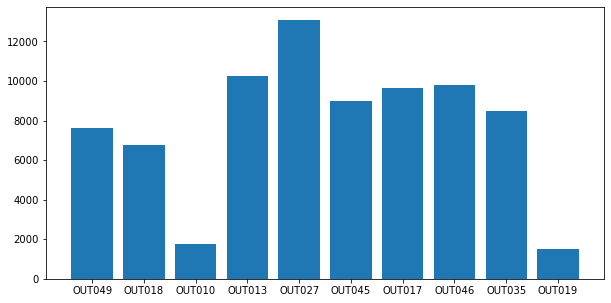

In [267]:
#Inference- values having the most sales have visibillity less than 0.2
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(train["Outlet_Identifier"],train["Item_Outlet_Sales"], width = 0.8)


<BarContainer object of 8523 artists>

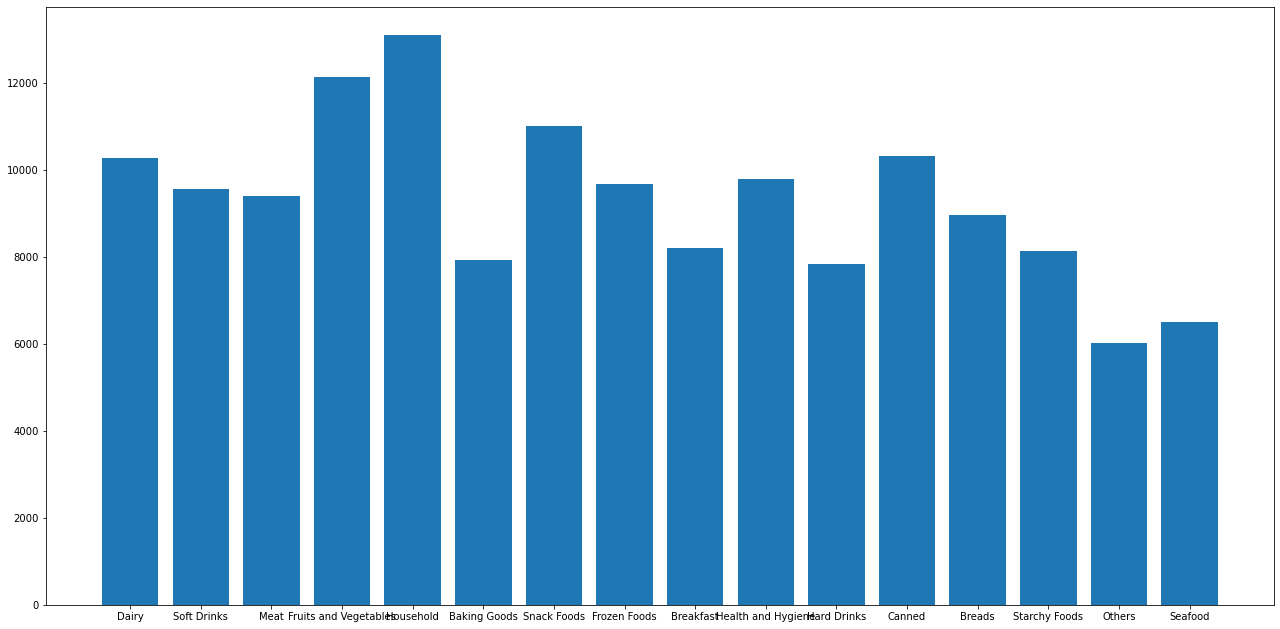

In [268]:
#OUT027 has contributed to majority of sales followed by OUT35. OUT10 and OUT19 have probably the least
#footfall, thereby contributing to the least outlet sales.
#plot of sales vs type of product 
fig, ax = plt.subplots(figsize=(22,11))
plt.bar(train["Item_Type"],train["Item_Outlet_Sales"], width = 0.8)
#Household items are the most sought after, followed by Fruits and vegetables.

(-0.5, 15.5, 0.0, 20000.0)

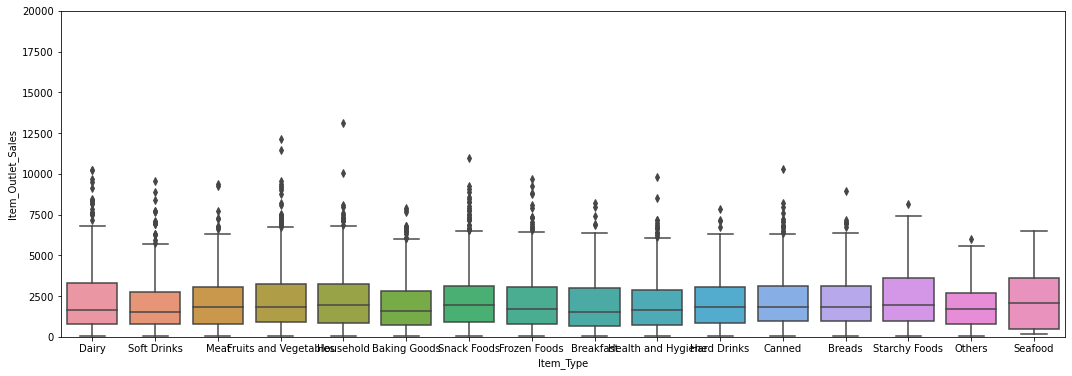

In [269]:
# Box plot of OverallQual vs SalePrice

data = pd.concat([train["Item_Type"], train["Item_Outlet_Sales"]], axis=1)
f, ax = plt.subplots(figsize=(18, 6))
fig = sns.boxplot(x="Item_Type", y="Item_Outlet_Sales", data=data)
fig.axis(ymin=0, ymax=20000)

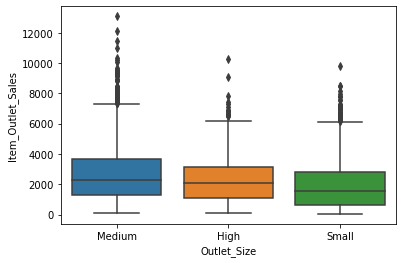

In [270]:
#BOXPLOT ANALYSIS
sns.boxplot(x = 'Outlet_Size', y = 'Item_Outlet_Sales', data = combi)
plt.show()

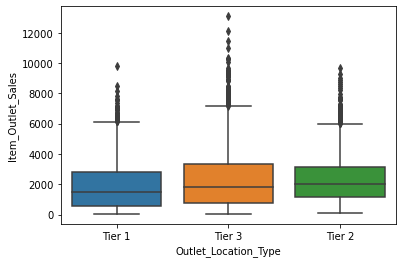

In [271]:
sns.boxplot(x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales', data = combi)
plt.show()

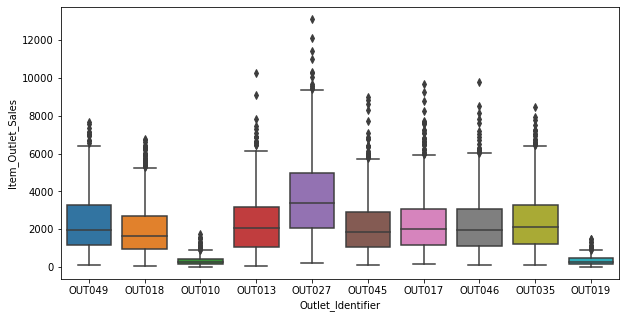

In [272]:
plt.figure(figsize = (10,5))
sns.boxplot(x = 'Outlet_Identifier', y = 'Item_Outlet_Sales', data = combi)
plt.show()

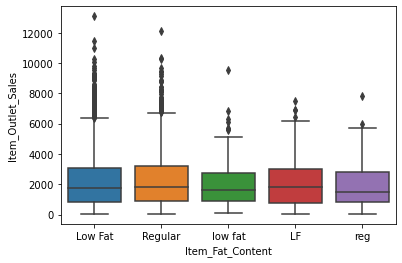

In [273]:
sns.boxplot(x = 'Item_Fat_Content', y = 'Item_Outlet_Sales', data = combi)

plt.show()
#Item fat content has repeating and redundant levels.

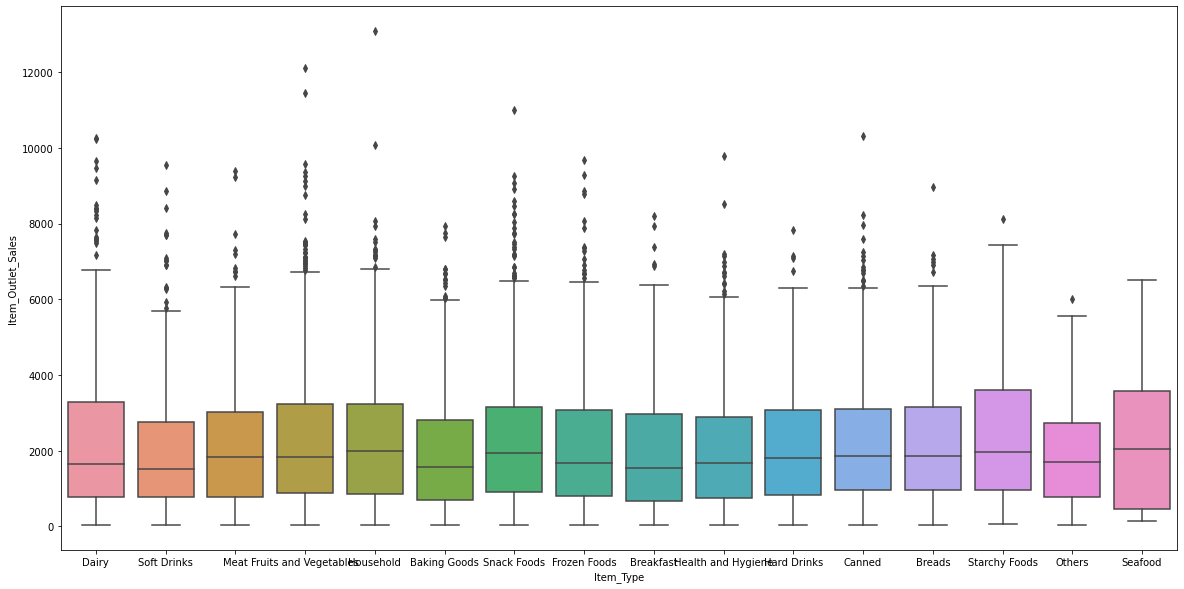

In [274]:
plt.figure(figsize = (20,10))
sns.boxplot(x = 'Item_Type', y = 'Item_Outlet_Sales', data = combi)
plt.show()

In [275]:
#Check missing values:
combi.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [276]:
combi["Item_Outlet_Sales"].fillna(combi["Item_Outlet_Sales"].mean(), inplace=True)
combi['Item_Weight'].fillna(combi['Item_Weight'].mean(), inplace=True)

In [277]:
combi['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [278]:
combi['Outlet_Size'].fillna(('Medium'), inplace = True)

In [279]:
combi.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

In [280]:
#0 in item visibility isn't practical so treating it as a NaN value. Replacing 0 with NaN
combi["Item_Visibility"].replace(0, np.nan, inplace=True)

In [281]:
#Imputing missing values in item visibillity by median
combi['Item_Visibility'].fillna(combi['Item_Visibility'].median(), inplace=True)

In [282]:
combi.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.057851,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.057851,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [283]:
#It was seen before that there are mismatched factor levels in item fat content.

combi["Item_Fat_Content"].replace('LF', 'Low Fat', inplace=True)
combi["Item_Fat_Content"].replace('low fat', 'Low Fat', inplace=True)
combi["Item_Fat_Content"].replace('reg', 'Regular', inplace=True)
combi["Item_Fat_Content"].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

<BarContainer object of 14204 artists>

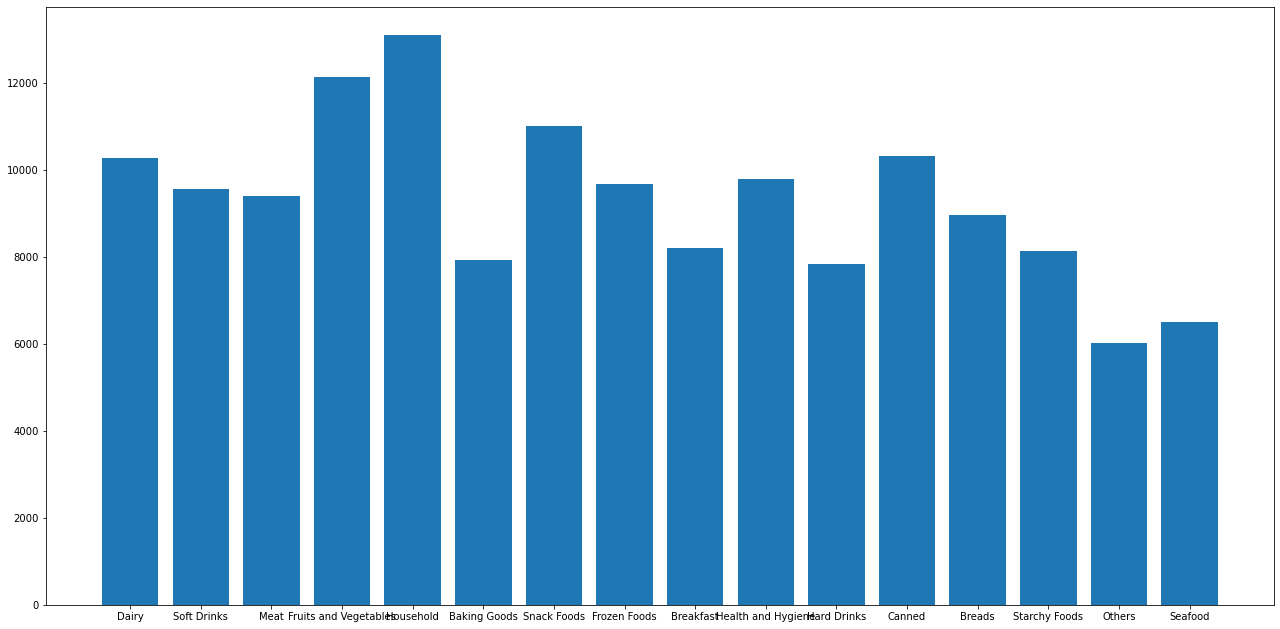

In [284]:
fig, ax = plt.subplots(figsize=(22,11))
plt.bar(combi["Item_Type"],combi["Item_Outlet_Sales"], width = 0.8)
#Household items contribute the most to sales followed by fruits and vegetables.

In [285]:

#Item type combine:
combi['Item_Identifier'].value_counts()
combi['Item_Type_Combined'] = combi['Item_Identifier'].apply(lambda x: x[0:2])
combi['Item_Type_Combined'] = combi['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
combi['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [289]:
#Import library:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
#New variable for outlet
combi['Outlet'] = le.fit_transform(combi['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    combi[i] = le.fit_transform(combi[i])

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Year
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,1,1,14
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,1,0,4
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,1,1,14
3,1121,19.20,1,0.057851,6,182.0950,0,1998,1,2,0,732.3800,1,1,15
4,1297,8.93,0,0.057851,9,53.8614,1,1987,0,2,1,994.7052,1,2,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,233,10.50,1,0.013496,13,141.3154,8,1997,2,0,1,1.0000,0,1,16
5677,308,7.60,1,0.142991,15,169.1448,3,2009,1,2,2,1.0000,0,1,4
5678,1426,10.00,0,0.073529,8,118.7440,7,2002,1,1,1,1.0000,0,2,11
5679,521,15.30,1,0.057851,3,214.6218,2,2007,1,1,1,1.0000,0,1,6


In [290]:
combi['Year'] = 2013- combi['Outlet_Establishment_Year']
combi.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Outlet,Year
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,1,9,14
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,0,3,4
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,1,9,14
3,FDX07,19.20,1,0.057851,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800,train,1,0,15
4,NCD19,8.93,0,0.057851,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,2,1,26


In [291]:
combi = pd.get_dummies(combi, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined'])
combi.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Outlet,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,9,...,0,1,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,3,...,0,1,0,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,9,...,0,1,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.057851,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,0,...,0,1,0,1,0,0,0,0,1,0
4,NCD19,8.93,0.057851,Household,53.8614,OUT013,1987,994.7052,train,1,...,1,0,0,0,1,0,0,0,0,1


In [292]:
import warnings
warnings.filterwarnings('ignore')
#Drop the columns which have been converted to different types:
combi.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
train = combi.loc[combi['source']=="train"]
test = combi.loc[combi['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [293]:

# Reading modified data
train2 = pd.read_csv("train_modified.csv")
test2 = pd.read_csv("test_modified.csv")

In [294]:
train2.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Outlet,Year,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,9,14,1,0,...,0,1,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,3,4,0,1,...,0,1,0,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,9,14,1,0,...,0,1,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.057851,182.0950,OUT010,732.3800,0,15,0,1,...,0,1,0,1,0,0,0,0,1,0
4,NCD19,8.93,0.057851,53.8614,OUT013,994.7052,1,26,1,0,...,1,0,0,0,1,0,0,0,0,1


In [295]:
X_train = train2.drop(['Item_Outlet_Sales', 'Outlet_Identifier','Item_Identifier'], axis=1)
y_train = train2.Item_Outlet_Sales

In [296]:

X_test = test2.drop(['Outlet_Identifier','Item_Identifier'], axis=1)

In [297]:
#BUILDING MODELS
#LINEAR REGRESSION
from sklearn.linear_model import  LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [298]:
lr_accuracy = round(regressor.score(X_train,y_train) * 100,2)
lr_accuracy

56.35

In [303]:
from sklearn.metrics import mean_squared_error
print("RMSE : ", np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(X_train))))

RMSE :  1127.4042036173628


In [304]:
#DECISION TREE
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=300)

In [305]:
y_pred = regressor.predict(X_test)
y_pred

array([1673.98398729, 1349.51290433,  471.30684669, ..., 1935.50411338,
       3805.94860417, 1349.51290433])

In [306]:

tree_accuracy = round(regressor.score(X_train,y_train),2)
tree_accuracy

0.59

In [308]:
r2_score(y_train, regressor.predict(X_train))

0.588335434306813

In [309]:

print("RMSE : " , np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(X_train))))

RMSE :  1094.8445446843184


In [310]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=50, n_jobs=4)

In [312]:

rf_accuracy = round(regressor.score(X_train,y_train),2)
rf_accuracy

0.61

In [314]:
print("RMSE : " ,np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(X_train))))

RMSE :  1062.1680473185886
